In [88]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler


from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['1_paper_quality.csv']))
target = 'TargetVariable'
features = df.columns[df.columns!=target]


Saving 1_paper_quality.csv to 1_paper_quality (2).csv


In [89]:
X = df[features].to_numpy()
y = df[target].to_numpy()
%matplotlib inline
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=1/7.0, random_state=0)


In [90]:
from sklearn.decomposition import PCA

# we create a PCA object (generical)
pca = PCA()

# we fit the dataset in X
pca.fit(X)

# we extract the principal components directions
print('first principal component direction:', pca.components_[:,0])

# and the corresponding explained variance
explained = pca.explained_variance_
explained

first principal component direction: [ 1.74235361e-04 -7.14007680e-06  2.56232268e-04  4.11293969e-05
  2.03573676e-04 -1.50099444e-03 -2.35015267e-04  1.46409178e-04
 -1.17754079e-03 -2.11547003e-03 -1.46652805e-03 -1.17067314e-03
 -3.48383413e-04  2.74124579e-03  4.54524599e-03  5.35098348e-03
  1.21582497e-03 -2.58105710e-02  7.56781305e-03 -6.06538447e-03
 -1.81589186e-03  1.23135181e-02 -1.26637085e-02 -1.56056750e-03
  6.54512832e-02 -3.11361847e-02 -3.98837261e-02 -7.59746794e-02
  9.01105118e-03  1.95587572e-02 -7.32095955e-02  5.81398402e-02
 -1.67554200e-01 -7.10831339e-01 -6.61083100e-01  8.01872081e-02
 -9.77458835e-03  1.09335996e-02  3.25115410e-04  3.38041652e-04
  4.26723372e-04 -1.54841190e-05]


array([9.86221816e+05, 7.02841739e+05, 3.41971695e+05, 1.71391259e+05,
       9.26874241e+04, 4.33559755e+04, 1.07880551e+04, 5.71660174e+03,
       1.29999694e+03, 1.08590777e+03, 9.52637723e+02, 9.12322813e+02,
       4.89363020e+02, 2.23100600e+02, 9.82737593e+01, 7.34124282e+01,
       4.65434046e+01, 2.69788275e+01, 2.11666292e+01, 1.52667856e+01,
       1.10101174e+01, 8.65333286e+00, 6.92179043e+00, 4.90573396e+00,
       2.74611071e+00, 2.04500595e+00, 1.95368528e+00, 1.63025711e+00,
       1.21700595e+00, 1.05843275e+00, 7.39568996e-01, 6.52377388e-01,
       4.36197278e-01, 3.46309058e-01, 2.97341055e-01, 2.69241908e-01,
       4.15538447e-02, 1.75389547e-02, 9.55743640e-04, 8.72319318e-04,
       4.73806121e-05, 2.25494271e-06])

In [91]:
T = pca.transform(X)

print('The same data point as before:', T[21])

The same data point as before: [-7.14595346e+02  7.23444404e+02  4.59483808e+01  5.36955641e+02
  1.70880173e+01 -1.19586915e+01 -6.07794427e+01 -5.26394029e+00
  1.75847849e+01  1.60113374e+01  8.24365066e+00  6.93157903e+00
 -4.64902527e+00 -1.98048259e+00  4.93575991e-01  1.91466050e+00
 -6.03468630e-01 -8.38100121e+00  5.49251926e+00 -1.05871235e+00
  9.60460537e-02  1.97779025e-01  2.36435213e+00 -5.55849679e-02
  1.18654165e+00 -2.66270043e-02 -9.56727254e-01  4.68929508e-01
 -5.56604995e-01  5.89199610e-01 -4.91502713e-01  5.73264386e-01
  2.84273590e-01 -5.62220918e-01 -3.68273080e-01 -5.89510718e-02
 -1.45776110e-01  3.78861367e-03  4.40396017e-02 -2.47743720e-02
 -6.42844996e-03 -4.94089185e-04]


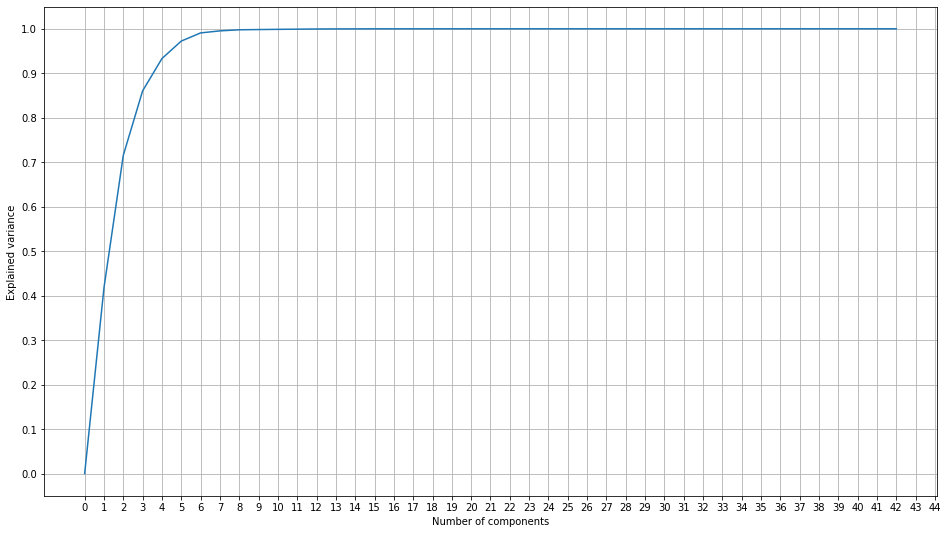

In [92]:
from matplotlib import pyplot as plt

explained_variance = np.cumsum(explained) / sum(explained)
explained_variance = np.insert(explained_variance, 0, 0.)

plt.figure(figsize=(16,9))
plt.plot(range(43), explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.xticks(range(45))
plt.yticks(np.arange(0., 1.1, 0.1))
plt.grid()
plt.show()

In [94]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
pca2 = PCA(n_components=5) #varince >= 0.95 with n = 5
X_train = pca2.fit_transform(X_train)
X_test = pca2.fit_transform(X_test)



lRegr = LinearRegression()
lRegr.fit(X_train, y_train)
y_hat_ridge = lRegr.predict(X_test)


print ("[] MSE TEST : %.2f"%mean_squared_error(y_test, y_hat_ridge))

[] MSE TEST : 5444.34
